In [1]:
import pandas as pd
import numpy as np
import re
import os
from src.evaluation import Evaluator, compilerPatterns, ResultsFromMeanStdDF
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
## This cell would need for testing phase - Ignore this
%load_ext autoreload
%autoreload 2

In [11]:
paths = [ os.path.join(dataset.name, experiment.name) 
         for dataset in os.scandir('experiments') if dataset.is_dir() and 'chembl' in dataset.name 
         for experiment in os.scandir(dataset.path)  ]

In [12]:
paths

['chemblAug5_SELFIES-RNN/2hl_256hu_512bs_0.001lr',
 'chemblAug5_SELFIES-RNN/2hl_512hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/2hl_512hu_512bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_256hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/2hl_256hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_256hu_512bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_512hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_512hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_256hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_512hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_256hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_256hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_256hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_512hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_512hu_512bs_0.001lr',
 'chemblAug5_fragSMILES-RNN/2hl_256hu_512bs_300es_0.001lr',
 'chemblAug5_fragSMILES-RNN/2hl_512hu_256bs_300es_0.001lr',
 'chemblAug5_fragSMILES-RNN/2hl_512hu_512bs_300es_0.001lr',
 'chemblAug5

In [13]:
evaluators = [Evaluator(path) for path in paths]

In [14]:
evaluators_table = pd.concat([evaluator.get_as_DFcell() for evaluator in evaluators ], ignore_index=True, axis=0)

In [15]:
evaluators_table = evaluators_table.groupby(['hl','hu','bs','lr']).agg(lambda x: x.dropna())

In [16]:
evaluators_table

chemblAug5_SELFIES-RNN  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11a22...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   

                                              chemblAug5_SMILES-RNN  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   

                                          chemblAug5_fragSMILES-RNN  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc1135c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   

                                                 chembl_SELFIES-RNN  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc11353...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc114fb...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc11a3c...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11350...   

                                                  chembl_SMILES-RNN  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc114df...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11350...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc11350...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11350...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc114fb...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc114df...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc114df...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11354...   

                                              chembl_fragSMILES-RNN  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc11355...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11357...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7fc11357...   
       512 0.001  <src.evaluation.Evaluator object at 0x7fc11357...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fc11355

In [17]:
evaluators_table.map(lambda x: x.load_logs())

chemblAug5_SELFIES-RNN  chemblAug5_SMILES-RNN  \
hl hu  bs  lr                                                     
2  256 256 0.001                    True                   True   
       512 0.001                    True                   True   
   512 256 0.001                    True                   True   
       512 0.001                    True                   True   
3  256 256 0.001                    True                   True   
       512 0.001                    True                   True   
   512 256 0.001                    True                   True   
       512 0.001                    True                   True   

                  chemblAug5_fragSMILES-RNN  chembl_SELFIES-RNN  \
hl hu  bs  lr                                                     
2  256 256 0.001                       True                True   
       512 0.001                       True                True   
   512 256 0.001                       True                True   
       512 0.001                       True                True   
3  256 256 0.001                       True                True   
       512 0.001                       True                True   
   512 256 0.001                       True                True   
       512 0.001                       True                True   

                  chembl_SMILES-RNN  chembl_fragSMILES-RNN  \
hl hu  bs  lr                                                
2  256 256 0.001               True                   True   
       512 0.001               True                   True   
   512 256 0.001               True                   True   
       512 0.001               True                   True   
3  256 256 0.001               True                   True   
       512 0.001               True                   True   
   512 256 0.001               True                   True   
       512 0.001               True                   True   

                  chemblAug5_t-SMILES-RNN  chembl_t-SMILES-RNN  
hl hu  bs  lr                                                   
2  256 256 0.001                     True                 True  
       512 0.001                     True                 True  
   512 256 0.001                     True                 True  
       512 0.001                     True                 True  
3  256 256 0.001                     True                 True  
       512 0.001                     True                 True  
   512 256 0.001                     True                 True  
       512 0.001                     True                 True

In [21]:
evaluators_table.map(lambda x: x.load_samples())

chemblAug5_SELFIES-RNN  chemblAug5_SMILES-RNN  \
hl hu  bs  lr                                                     
2  256 256 0.001                    True                   True   
       512 0.001                    True                   True   
   512 256 0.001                    True                   True   
       512 0.001                    True                   True   
3  256 256 0.001                    True                   True   
       512 0.001                    True                   True   
   512 256 0.001                    True                   True   
       512 0.001                    True                   True   

                  chemblAug5_fragSMILES-RNN  chembl_SELFIES-RNN  \
hl hu  bs  lr                                                     
2  256 256 0.001                       True                True   
       512 0.001                       True                True   
   512 256 0.001                       True                True   
       512 0.001                       True                True   
3  256 256 0.001                       True                True   
       512 0.001                       True                True   
   512 256 0.001                       True                True   
       512 0.001                       True                True   

                  chembl_SMILES-RNN  chembl_fragSMILES-RNN  \
hl hu  bs  lr                                                
2  256 256 0.001               True                   True   
       512 0.001               True                   True   
   512 256 0.001               True                   True   
       512 0.001               True                   True   
3  256 256 0.001               True                   True   
       512 0.001               True                   True   
   512 256 0.001               True                   True   
       512 0.001               True                   True   

                  chemblAug5_t-SMILES-RNN  chembl_t-SMILES-RNN  
hl hu  bs  lr                                                   
2  256 256 0.001                     True                 True  
       512 0.001                     True                 True  
   512 256 0.001                     True                 True  
       512 0.001                     True                 True  
3  256 256 0.001                     True                 True  
       512 0.001                     True                 True  
   512 256 0.001                     True                 True  
       512 0.001                     True                 True

## loss

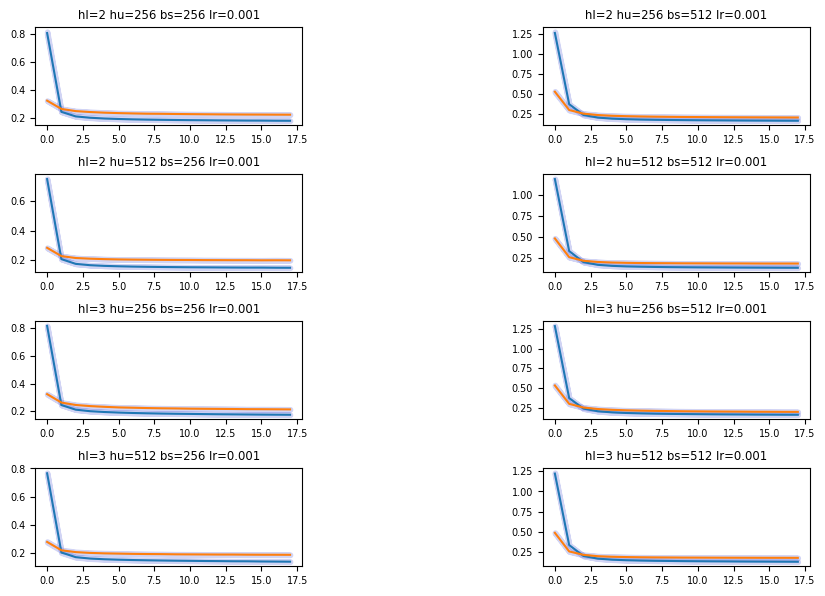

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})

fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(10,7),gridspec_kw={'wspace':0.9, 'hspace':0.5})
for evaluator, ax in zip(evaluators_table['chemblAug5_t-SMILES-RNN'], axes.flatten()):
    evaluator.plot_logs(ax)

## Syntax metrics

In [18]:
from scipy import stats

In [22]:
genDFs=pd.concat( [evaluator.getResultsGens() for evaluator in evaluators if evaluator.samples is not None], ignore_index=True )

In [23]:
genDFs['valid%']=genDFs['valid']/genDFs['amount']
genDFs['unique%']=genDFs['unique']/genDFs['valid']
genDFs['novel%']=genDFs['novel']/genDFs['unique']

In [29]:
params=[2,512,512,0.001]
params5=[2,512,256,0.001]

In [24]:
genGrp=genDFs.drop(columns=['fold','epoch','T','amount']).groupby(['dataset','hl','hu','bs','lr'],as_index=True, dropna=False)

In [25]:
genStats=genGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ]

In [26]:
genStats=ResultsFromMeanStdDF(genStats)

In [27]:
genStats

valid         unique  \
dataset                hl hu  bs  lr                                   
chemblAug5_SELFIES-RNN 2  256 256 0.001  6000.0 ± 0.0   6000.0 ± 0.0   
                              512 0.001  5999.8 ± 0.4   5999.0 ± 1.0   
                          512 256 0.001  6000.0 ± 0.0   6000.0 ± 0.0   
                              512 0.001  6000.0 ± 0.0   5999.6 ± 0.9   
                       3  256 256 0.001  5999.8 ± 0.4   5999.8 ± 0.4   
...                                               ...            ...   
chembl_t-SMILES-RNN    2  512 512 0.001  6000.0 ± 0.0  5880.0 ± 10.0   
                       3  256 256 0.001  6000.0 ± 0.0  5870.0 ± 20.0   
                              512 0.001  6000.0 ± 0.0  5840.0 ± 10.0   
                          512 256 0.001  6000.0 ± 0.0  5900.0 ± 20.0   
                              512 0.001  6000.0 ± 0.0  5900.0 ± 10.0   

                                                 novel           valid%  \
dataset                hl hu  bs  lr                                      
chemblAug5_SELFIES-RNN 2  256 256 0.001   5999.0 ± 1.0        1.0 ± 0.0   
                              512 0.001   5999.0 ± 1.0  0.99997 ± 7e-05   
                          512 256 0.001   5997.0 ± 1.0        1.0 ± 0.0   
                              512 0.001   5998.0 ± 2.0        1.0 ± 0.0   
                       3  256 256 0.001   5999.4 ± 0.9  0.99997 ± 7e-05   
...                                                ...              ...   
chembl_t-SMILES-RNN    2  512 512 0.001  5860.0 ± 10.0        1.0 ± 0.0   
                       3  256 256 0.001  5870.0 ± 20.0        1.0 ± 0.0   
                              512 0.001  5840.0 ± 10.0        1.0 ± 0.0   
                          512 256 0.001  5880.0 ± 20.0        1.0 ± 0.0   
                              512 0.001   5874.0 ± 7.0        1.0 ± 0.0   

                                                 unique%           novel%  
dataset                hl hu  bs  lr                                       
chemblAug5_SELFIES-RNN 2  256 256 0.001        1.0 ± 0.0  0.9999 ± 0.0002  
                              512 0.001  0.9998 ± 0.0002        1.0 ± 0.0  
                          512 256 0.001        1.0 ± 0.0  0.9996 ± 0.0002  
                              512 0.001  0.9999 ± 0.0001  0.9998 ± 0.0002  
                       3  256 256 0.001        1.0 ± 0.0  0.99993 ± 9e-05  
...                                                  ...              ...  
chembl_t-SMILES-RNN    2  512 512 0.001     0.98 ± 0.002  0.9957 ± 0.0005  
                       3  256 256 0.001    0.978 ± 0.004  0.9995 ± 0.0003  
                              512 0.001    0.973 ± 0.002  0.9995 ± 0.0003  
                          512 256 0.001    0.983 ± 0.003    0.997 ± 0.001  
                              512 0.001    0.983 ± 0.002    0.996 ± 0.001  

[64 rows x 6 columns]

In [28]:
genStats.query(' ( hl==2 and hu==512 and bs==256 ) or ( hl==2 and hu==512 and bs==512 ) ')

valid          unique  \
dataset                   hl hu  bs  lr                                      
chemblAug5_SELFIES-RNN    2  512 256 0.001    6000.0 ± 0.0    6000.0 ± 0.0   
                                 512 0.001    6000.0 ± 0.0    5999.6 ± 0.9   
chemblAug5_SMILES-RNN     2  512 256 0.001   5300.0 ± 40.0   5300.0 ± 40.0   
                                 512 0.001   5220.0 ± 50.0   5220.0 ± 50.0   
chemblAug5_fragSMILES-RNN 2  512 256 0.001   5420.0 ± 60.0   5410.0 ± 60.0   
                                 512 0.001   5320.0 ± 70.0   5310.0 ± 70.0   
chemblAug5_t-SMILES-RNN   2  512 256 0.001    6000.0 ± 0.0   5930.0 ± 10.0   
                                 512 0.001    6000.0 ± 0.0   5920.0 ± 10.0   
chembl_SELFIES-RNN        2  512 256 0.001    6000.0 ± 0.0    5998.0 ± 1.0   
                                 512 0.001    6000.0 ± 0.0    5999.0 ± 2.0   
chembl_SMILES-RNN         2  512 256 0.001  4600.0 ± 300.0  4600.0 ± 300.0   
                                 512 0.001   4930.0 ± 70.0   4920.0 ± 70.0   
chembl_fragSMILES-RNN     2  512 256 0.001   5200.0 ± 90.0   5200.0 ± 90.0   
                                 512 0.001   5280.0 ± 20.0   5270.0 ± 30.0   
chembl_t-SMILES-RNN       2  512 256 0.001    6000.0 ± 0.0   5890.0 ± 20.0   
                                 512 0.001    6000.0 ± 0.0   5880.0 ± 10.0   

                                                     novel         valid%  \
dataset                   hl hu  bs  lr                                     
chemblAug5_SELFIES-RNN    2  512 256 0.001    5997.0 ± 1.0      1.0 ± 0.0   
                                 512 0.001    5998.0 ± 2.0      1.0 ± 0.0   
chemblAug5_SMILES-RNN     2  512 256 0.001   5280.0 ± 40.0  0.883 ± 0.007   
                                 512 0.001   5210.0 ± 50.0   0.87 ± 0.009   
chemblAug5_fragSMILES-RNN 2  512 256 0.001   5300.0 ± 60.0  0.903 ± 0.009   
                                 512 0.001   5240.0 ± 70.0    0.89 ± 0.01   
chemblAug5_t-SMILES-RNN   2  512 256 0.001   5880.0 ± 10.0      1.0 ± 0.0   
                                 512 0.001   5880.0 ± 10.0      1.0 ± 0.0   
chembl_SELFIES-RNN        2  512 256 0.001    5978.0 ± 4.0      1.0 ± 0.0   
                                 512 0.001    5971.0 ± 2.0      1.0 ± 0.0   
chembl_SMILES-RNN         2  512 256 0.001  4500.0 ± 300.0    0.77 ± 0.05   
                                 512 0.001   4770.0 ± 60.0    0.82 ± 0.01   
chembl_fragSMILES-RNN     2  512 256 0.001   5110.0 ± 80.0    0.87 ± 0.01   
                                 512 0.001   5110.0 ± 40.0   0.88 ± 0.004   
chembl_t-SMILES-RNN       2  512 256 0.001   5880.0 ± 20.0      1.0 ± 0.0   
                                 512 0.001   5860.0 ± 10.0      1.0 ± 0.0   

                                                    unique%           novel%  
dataset                   hl hu  bs  lr                                       
chemblAug5_SELFIES-RNN    2  512 256 0.001        1.0 ± 0.0  0.9996 ± 0.0002  
                                 512 0.001  0.9999 ± 0.0001  0.9998 ± 0.0002  
chemblAug5_SMILES-RNN     2  512 256 0.001  0.9999 ± 0.0002   0.997 ± 0.0009  
                                 512 0.001        1.0 ± 0.0  0.9982 ± 0.0006  
chemblAug5_fragSMILES-RNN 2  512 256 0.001  0.9991 ± 0.0006     0.98 ± 0.003  
                                 512 0.001  0.9995 ± 0.0004    0.987 ± 0.002  
chemblAug5_t-SMILES-RNN   2  512 256 0.001    0.988 ± 0.002  0.9929 ± 0.0005  
                                 512 0.001    0.987 ± 0.002    0.993 ± 0.001  
chembl_SELFIES-RNN        2  512 256 0.001  0.9997 ± 0.0002  0.9967 ± 0.0005  
                                 512 0.001  0.9998 ± 0.0003  0.9953 ± 0.0006  
chembl_SMILES-RNN         2  512 256 0.001  0.9989 ± 0.0005    0.984 ± 0.006  
                                 512 0.001    0.997 ± 0.001     0.97 ± 0.002  
chembl_fragSMILES-RNN     2  512 256 0.001  0.9993 ± 0.0003    0.984 ± 0.003  
                                 512 0.001  0.9976 ± 0.0005    0.971 ± 0.004

In [30]:
genPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                genGrp.get_group((f'chembl_{notation}-RNN',*params))[metric],
                genGrp.get_group(('chembl_fragSMILES-RNN',*params))[metric],
                ).pvalue for metric in genStats.columns} for notation in ['SMILES','SELFIES','t-SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                genGrp.get_group((f'chemblAug5_{notation}-RNN',*params5))[metric],
                genGrp.get_group(('chemblAug5_fragSMILES-RNN',*params5))[metric],
                ).pvalue for metric in genStats.columns} for notation in ['SMILES','SELFIES','t-SMILES']
                }
                , orient='index'
            )

/usr/lib/python3/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [31]:
genPvals

,valid,unique,novel,valid%,unique%,novel%
SMILESx1,5.836981e-06,4.036319e-06,6.399316e-06,5.836981e-06,5.176434e-01,8.938461e-01
SELFIESx1,2.642000e-12,3.675778e-12,8.476472e-11,2.642000e-12,3.028969e-05,1.109582e-06
t-SMILESx1,7.098553e-14,1.431608e-12,1.896384e-11,7.098553e-14,1.444152e-08,1.342754e-07
SMILESx5,5.479541e-03,6.740004e-03,4.799941e-01,5.479541e-03,2.085233e-02,1.086421e-06
SELFIESx5,1.224551e-08,1.288487e-08,3.641024e-09,1.224551e-08,1.130664e-02,2.598607e-07
t-SMILESx5,1.224551e-08,4.366994e-08,1.810566e-08,1.224551e-08,2.453184e-06,7.026176e-06


In [32]:
genPvals.map(lambda x: x<0.05)

,valid,unique,novel,valid%,unique%,novel%
SMILESx1,True,True,True,True,False,False
SELFIESx1,True,True,True,True,True,True
t-SMILESx1,True,True,True,True,True,True
SMILESx5,True,True,False,True,True,True
SELFIESx5,True,True,True,True,True,True
t-SMILESx5,True,True,True,True,True,True


In [63]:
genStats.to_csv('results/07_grisoniSyntax.csv')

## Chiral Metrics

In [52]:
genChirDFs=pd.concat( [evaluator.getChiralResultsGens() for evaluator in evaluators if not evaluator.samples is None], ignore_index=True)

In [53]:
genChirDFs

,fold,amount,epoch,T,chirals,invalid,valid,unique,novel,dataset,hl,hu,bs,lr
0,0,6000,3,1.0,1694,647,1047,1047,1047,chemblAug5_SELFIES-RNN,2,256,512,0.001
1,1,6000,3,1.0,1820,753,1067,1067,1067,chemblAug5_SELFIES-RNN,2,256,512,0.001
2,2,6000,3,1.0,1818,725,1093,1093,1093,chemblAug5_SELFIES-RNN,2,256,512,0.001
3,3,6000,3,1.0,1860,766,1094,1094,1094,chemblAug5_SELFIES-RNN,2,256,512,0.001
4,4,6000,3,1.0,1867,733,1134,1134,1134,chemblAug5_SELFIES-RNN,2,256,512,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,6000,10,1.0,1985,1024,961,961,958,chembl_t-SMILES-RNN,3,512,512,0.001
317,1,6000,10,1.0,1762,844,918,918,917,chembl_t-SMILES-RNN,3,512,512,0.001
318,2,6000,10,1.0,2035,1059,976,976,975,chembl_t-SMILES-RNN,3,512,512,0.001
319,3,6000,10,1.0,1757,851,906,906,904,chembl_t-SMILES-RNN,3,512,512,0.001


In [54]:
genChirDFs['invalid%']=genChirDFs['invalid']/genChirDFs['chirals']
genChirDFs['valid%']=genChirDFs['valid']/genChirDFs['chirals']
genChirDFs['unique%']=genChirDFs['unique']/genChirDFs['valid']
genChirDFs['novel%']=genChirDFs['novel']/genChirDFs['unique']

In [55]:
genChirGrp = genChirDFs.drop(columns=['fold','epoch','T','amount']).groupby(['dataset','hl','hu','bs','lr'],as_index=True, dropna=False)

In [56]:
genChirStats=genChirGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ]

In [57]:
genChirStats=ResultsFromMeanStdDF(genChirStats)

In [58]:
genChirStats.query(' ( hl==2 and hu==512 and bs==256 ) or ( hl==2 and hu==512 and bs==512 ) ')

chirals         invalid  \
dataset                   hl hu  bs  lr                                      
chemblAug5_SELFIES-RNN    2  512 256 0.001  1900.0 ± 100.0    520.0 ± 40.0   
                                 512 0.001  1900.0 ± 200.0    560.0 ± 60.0   
chemblAug5_SMILES-RNN     2  512 256 0.001  1800.0 ± 200.0    320.0 ± 50.0   
                                 512 0.001  1800.0 ± 100.0    330.0 ± 50.0   
chemblAug5_fragSMILES-RNN 2  512 256 0.001  2000.0 ± 100.0    290.0 ± 30.0   
                                 512 0.001  1900.0 ± 200.0    340.0 ± 40.0   
chemblAug5_t-SMILES-RNN   2  512 256 0.001  1900.0 ± 100.0  1000.0 ± 100.0   
                                 512 0.001   1880.0 ± 70.0    990.0 ± 60.0   
chembl_SELFIES-RNN        2  512 256 0.001  1800.0 ± 100.0    710.0 ± 80.0   
                                 512 0.001   1820.0 ± 40.0    670.0 ± 40.0   
chembl_SMILES-RNN         2  512 256 0.001  1700.0 ± 100.0   500.0 ± 100.0   
                                 512 0.001   1770.0 ± 70.0    400.0 ± 40.0   
chembl_fragSMILES-RNN     2  512 256 0.001  1800.0 ± 200.0    370.0 ± 50.0   
                                 512 0.001   1770.0 ± 90.0    330.0 ± 30.0   
chembl_t-SMILES-RNN       2  512 256 0.001  1700.0 ± 100.0   900.0 ± 200.0   
                                 512 0.001   1840.0 ± 90.0   1010.0 ± 50.0   

                                                     valid          unique  \
dataset                   hl hu  bs  lr                                      
chemblAug5_SELFIES-RNN    2  512 256 0.001   1380.0 ± 80.0   1380.0 ± 80.0   
                                 512 0.001  1300.0 ± 100.0  1300.0 ± 100.0   
chemblAug5_SMILES-RNN     2  512 256 0.001  1500.0 ± 100.0  1500.0 ± 100.0   
                                 512 0.001   1510.0 ± 80.0   1510.0 ± 80.0   
chemblAug5_fragSMILES-RNN 2  512 256 0.001  1700.0 ± 100.0  1700.0 ± 100.0   
                                 512 0.001  1600.0 ± 200.0  1600.0 ± 200.0   
chemblAug5_t-SMILES-RNN   2  512 256 0.001    890.0 ± 60.0    890.0 ± 60.0   
                                 512 0.001    890.0 ± 40.0    890.0 ± 40.0   
chembl_SELFIES-RNN        2  512 256 0.001   1140.0 ± 90.0   1140.0 ± 90.0   
                                 512 0.001   1150.0 ± 20.0   1150.0 ± 20.0   
chembl_SMILES-RNN         2  512 256 0.001   1260.0 ± 90.0   1250.0 ± 90.0   
                                 512 0.001   1370.0 ± 40.0   1370.0 ± 40.0   
chembl_fragSMILES-RNN     2  512 256 0.001  1400.0 ± 200.0  1400.0 ± 200.0   
                                 512 0.001   1440.0 ± 70.0   1440.0 ± 60.0   
chembl_t-SMILES-RNN       2  512 256 0.001   800.0 ± 100.0   800.0 ± 100.0   
                                 512 0.001    830.0 ± 50.0    830.0 ± 50.0   

                                                     novel       invalid%  \
dataset                   hl hu  bs  lr                                     
chemblAug5_SELFIES-RNN    2  512 256 0.001   1370.0 ± 80.0  0.274 ± 0.009   
                                 512 0.001  1300.0 ± 100.0     0.3 ± 0.01   
chemblAug5_SMILES-RNN     2  512 256 0.001  1500.0 ± 100.0    0.17 ± 0.01   
                                 512 0.001   1500.0 ± 80.0    0.18 ± 0.02   
chemblAug5_fragSMILES-RNN 2  512 256 0.001  1600.0 ± 100.0    0.15 ± 0.01   
                                 512 0.001  1600.0 ± 200.0    0.18 ± 0.01   
chemblAug5_t-SMILES-RNN   2  512 256 0.001    880.0 ± 60.0    0.53 ± 0.04   
                                 512 0.001    890.0 ± 40.0    0.52 ± 0.02   
chembl_SELFIES-RNN        2  512 256 0.001   1130.0 ± 90.0    0.38 ± 0.02   
                                 512 0.001   1140.0 ± 20.0    0.37 ± 0.01   
chembl_SMILES-RNN         2  512 256 0.001   1230.0 ± 90.0    0.28 ± 0.05   
                                 512 0.001   1320.0 ± 40.0    0.22 ± 0.02   
chembl_fragSMILES-RNN     2  512 256 0.001  1400.0 ± 100.0    0.21 ± 0.02   
                                 512 0.001   1400.0 ± 60.0    0.19 ± 0.01   
chembl_t-

In [39]:
genChirPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                genChirGrp.get_group((f'chembl_{notation}-RNN',*params5))[metric],
                genChirGrp.get_group(('chembl_fragSMILES-RNN',*params5))[metric],
                ).pvalue for metric in genChirStats.columns} for notation in ['SELFIES','SMILES','t-SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                genChirGrp.get_group((f'chemblAug5_{notation}-RNN',*params5))[metric],
                genChirGrp.get_group(('chemblAug5_fragSMILES-RNN',*params5))[metric],
                ).pvalue for metric in genChirStats.columns} for notation in ['SELFIES','SMILES','t-SMILES']
                }
                , orient='index'
            )

In [40]:
genChirPvals

,chirals,invalid,valid,unique,novel
SELFIESx1,0.495313,0.000039,1.056383e-02,1.052345e-02,1.335194e-02
SMILESx1,0.756967,0.082829,1.153163e-01,1.109141e-01,1.000913e-01
t-SMILESx1,0.452095,0.000249,6.322716e-05,6.294019e-05,6.880030e-05
SELFIESx5,0.418123,0.000011,1.291996e-03,1.373308e-03,2.685745e-03
SMILESx5,0.238558,0.428223,7.316043e-02,7.693881e-02,1.525359e-01
t-SMILESx5,0.377562,0.000004,5.431883e-07,5.703120e-07,6.106639e-07


In [41]:
genChirPvals.map(lambda x: x<0.05)

,chirals,invalid,valid,unique,novel
SELFIESx1,False,True,True,True,True
SMILESx1,False,False,False,False,False
t-SMILESx1,False,True,True,True,True
SELFIESx5,False,True,True,True,True
SMILESx5,False,False,False,False,False
t-SMILESx5,False,True,True,True,True


In [62]:
genChirStats.to_csv('results/07_grisoniChirals.csv')

## Metrics of Novels

In [42]:
novels = pd.concat( [evaluator.getResultsNovels() for evaluator in evaluators], ignore_index=True)
novels.drop(columns=['amount','epoch','T'],inplace=True)

In [44]:
novGrp=novels.fillna(-1).groupby(['dataset','hl','hu','bs','lr'], as_index=True, dropna=False)

In [45]:
metrics = [metric for metric in novels.columns if metric not in compilerPatterns.index]

In [46]:
novStats=novGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns='fold')

In [47]:
novStats = ResultsFromMeanStdDF(novStats)

In [48]:
novStats.query(' ( hl==2 and hu==512 and bs==256 ) or ( hl==2 and hu==512 and bs==512 ) ')

FCD/Test       SNN/Test  \
dataset                   hl hu  bs  lr                                  
chemblAug5_SELFIES-RNN    2  512 256 0.001    3.4 ± 0.1  0.375 ± 0.001   
                                 512 0.001    3.9 ± 0.1  0.366 ± 0.001   
chemblAug5_SMILES-RNN     2  512 256 0.001  0.99 ± 0.07  0.428 ± 0.001   
                                 512 0.001  1.04 ± 0.04  0.422 ± 0.002   
chemblAug5_fragSMILES-RNN 2  512 256 0.001  0.72 ± 0.06    0.5 ± 0.006   
                                 512 0.001  0.76 ± 0.07   0.48 ± 0.005   
chemblAug5_t-SMILES-RNN   2  512 256 0.001  1.37 ± 0.06  0.443 ± 0.006   
                                 512 0.001  1.38 ± 0.08  0.442 ± 0.003   
chembl_SELFIES-RNN        2  512 256 0.001    6.0 ± 0.4  0.371 ± 0.007   
                                 512 0.001    5.5 ± 0.2  0.377 ± 0.005   
chembl_SMILES-RNN         2  512 256 0.001    1.5 ± 0.2    0.46 ± 0.02   
                                 512 0.001    0.8 ± 0.1  0.486 ± 0.003   
chembl_fragSMILES-RNN     2  512 256 0.001    1.1 ± 0.2  0.492 ± 0.007   
                                 512 0.001  0.69 ± 0.05   0.51 ± 0.003   
chembl_t-SMILES-RNN       2  512 256 0.001    2.1 ± 0.4    0.42 ± 0.01   
                                 512 0.001  1.56 ± 0.08  0.428 ± 0.003   

                                              Scaf/Test           IntDiv  \
dataset                   hl hu  bs  lr                                    
chemblAug5_SELFIES-RNN    2  512 256 0.001  0.25 ± 0.02  0.8764 ± 0.0006   
                                 512 0.001  0.23 ± 0.02  0.8782 ± 0.0009   
chemblAug5_SMILES-RNN     2  512 256 0.001   0.3 ± 0.04    0.872 ± 0.001   
                                 512 0.001  0.29 ± 0.03  0.8716 ± 0.0009   
chemblAug5_fragSMILES-RNN 2  512 256 0.001  0.38 ± 0.02    0.869 ± 0.002   
                                 512 0.001  0.36 ± 0.05    0.869 ± 0.003   
chemblAug5_t-SMILES-RNN   2  512 256 0.001  0.31 ± 0.02    0.874 ± 0.001   
                                 512 0.001  0.34 ± 0.02  0.8747 ± 0.0008   
chembl_SELFIES-RNN        2  512 256 0.001  0.25 ± 0.05     0.88 ± 0.002   
                                 512 0.001  0.25 ± 0.04     0.88 ± 0.001   
chembl_SMILES-RNN         2  512 256 0.001  0.31 ± 0.07    0.868 ± 0.005   
                                 512 0.001  0.38 ± 0.04    0.869 ± 0.001   
chembl_fragSMILES-RNN     2  512 256 0.001  0.41 ± 0.05     0.87 ± 0.002   
                                 512 0.001  0.38 ± 0.02  0.8689 ± 0.0008   
chembl_t-SMILES-RNN       2  512 256 0.001  0.33 ± 0.04    0.874 ± 0.002   
                                 512 0.001  0.33 ± 0.02  0.8752 ± 0.0009   

                                                    IntDiv2        Filters  \
dataset                   hl hu  bs  lr                                      
chemblAug5_SELFIES-RNN    2  512 256 0.001  0.8715 ± 0.0006    0.68 ± 0.01   
                                 512 0.001  0.8734 ± 0.0009    0.65 ± 0.01   
chemblAug5_SMILES-RNN     2  512 256 0.001    0.867 ± 0.001  0.841 ± 0.006   
                                 512 0.001   0.866 ± 0.0009  0.838 ± 0.009   
chemblAug5_fragSMILES-RNN 2  512 256 0.001    0.863 ± 0.002    0.85 ± 0.01   
                                 512 0.001    0.864 ± 0.003  0.846 ± 0.008   
chemblAug5_t-SMILES-RNN   2  512 256 0.001    0.869 ± 0.001   0.823 ± 0.01   
                                 512 0.001  0.8687 ± 0.0008    0.83 ± 0.01   
chembl_SELFIES-RNN        2  512 256 0.001    0.875 ± 0.002    0.57 ± 0.01   
                                 512 0.001    0.875 ± 0.001  0.578 ± 0.008   
chembl_SMILES-RNN         2  512 256 0.001    0.862 ± 0.004    0.82 ± 0.03   
                                 512 0.001    0.863 ± 0.001  0.849 ± 0.005   
chembl_fragSMILES-RNN     2  512 256 0.001    0.864 ± 0.002  0.848 ± 0.006   
                                 512 0.001  0.8634 ± 0.0008  0.845 ± 0.003   
chembl_t-SMILES-RNN       2  512 256 0.001    0.867 ± 0.002    0.82 ± 0.03   
                   

In [28]:
novStats.T.to_csv('results/07_grisoniNovelMetrics.csv')

In [49]:
novPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                novGrp.get_group((f'chembl_{notation}-RNN',*params5))[metric],
                novGrp.get_group(('chembl_fragSMILES-RNN',*params5))[metric],
                ).pvalue for metric in novStats.columns} for notation in ['SELFIES','SMILES','t-SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                novGrp.get_group((f'chembl_{notation}-RNN',*params5))[metric],
                novGrp.get_group(('chembl_fragSMILES-RNN',*params5))[metric],
                ).pvalue for metric in novStats.columns} for notation in ['SELFIES','SMILES','t-SMILES']
                }
                , orient='index'
            )

In [50]:
novPvals

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SELFIESx1,7.459278e-09,3.394148e-09,0.000657,0.000063,0.000039,1.821065e-10,0.653427,0.000002,0.104363,0.005882
SMILESx1,2.239403e-02,1.113732e-02,0.030406,0.333147,0.339425,3.971243e-02,0.120178,0.711556,0.192164,0.217815
t-SMILESx1,5.393689e-04,1.067575e-05,0.017221,0.045368,0.062535,5.817155e-02,0.379572,0.881254,0.649129,0.030781
SELFIESx5,7.459278e-09,3.394148e-09,0.000657,0.000063,0.000039,1.821065e-10,0.653427,0.000002,0.104363,0.005882
SMILESx5,2.239403e-02,1.113732e-02,0.030406,0.333147,0.339425,3.971243e-02,0.120178,0.711556,0.192164,0.217815
t-SMILESx5,5.393689e-04,1.067575e-05,0.017221,0.045368,0.062535,5.817155e-02,0.379572,0.881254,0.649129,0.030781


In [51]:
novPvals.map(lambda x: x<0.05)

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SELFIESx1,True,True,True,True,True,True,False,True,False,True
SMILESx1,True,True,True,False,False,True,False,False,False,False
t-SMILESx1,True,True,True,True,False,False,False,False,False,True
SELFIESx5,True,True,True,True,True,True,False,True,False,True
SMILESx5,True,True,True,False,False,True,False,False,False,False
t-SMILESx5,True,True,True,True,False,False,False,False,False,True
